# Maths working

Understanding the derivations from [aceitunoResonancesInducedSpiking2020](http://arxiv.org/abs/2006.08537)

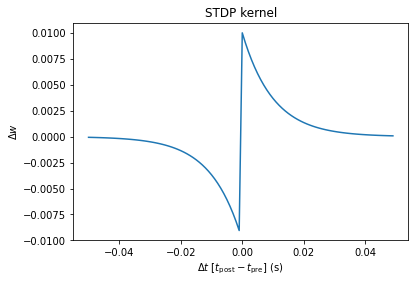

In [1]:
import matplotlib.pyplot as plt
import numpy as np

A_plus = 1e-2
A_minus = -1e-2
A_plus_minus = lambda delta_t: (delta_t<0)*A_minus + (delta_t>=0)*A_plus
tau_S = 10e-3

delta_t = np.arange(-50e-3,50e-3,1e-3)

plt.plot(delta_t, A_plus_minus(delta_t)*np.exp(-abs(delta_t)/tau_S))
plt.title('STDP kernel')
plt.xlabel(r'$\Delta t$ [$t_{\rm{post}} - t_{\rm{pre}}$] (s)')
plt.ylabel('$\Delta w$')
plt.show()

## Equations 8-9

We have this integral for the "plasticity trace" - how much the weight of a synapse would change at a particular time, if a presynaptic spike were to occur at that time

$$\int_{-\infty}^\infty x_n(t + \Delta t) A_\pm e^\frac{-|\Delta t|}{\tau_S} \text{ d}\Delta t$$

Splitting the limits of integration:

$$= \int_{-\infty}^0 x_n(t + \Delta t) A_- e^\frac{\Delta t}{\tau_S} \text{ d}\Delta t + \int_{0}^\infty x_n(t + \Delta t) A_+ e^\frac{-\Delta t}{\tau_S} \text{ d}\Delta t$$

Substituting the Taylor series approximation, $x_n(t + \Delta t) \approx x_n(t) + \Delta t \dot x_n(t)$, we get:

$$\begin{align*}
	&\approx \int_{-\infty}^0 \left(x_n(t) + \Delta t \dot x_n(t)\right) A_- e^\frac{\Delta t}{\tau_S} \text{ d}\Delta t + \int_{0}^\infty \left(x_n(t) + \Delta t \dot x_n(t)\right) A_+ e^\frac{-\Delta t}{\tau_S} \text{ d}\Delta t \\
	&= x_n(t) \left[ \int_{-\infty}^0 A_- e^\frac{\Delta t}{\tau_S} \text{ d}\Delta t + \int_{0}^\infty A_+ e^\frac{-\Delta t}{\tau_S} \text{ d}\Delta t \right]+ 
	\dot x_n(t) \left[ \int_{-\infty}^0 \Delta t A_- e^\frac{\Delta t}{\tau_S} \text{ d}\Delta t + \int_{0}^\infty \Delta t A_+ e^\frac{-\Delta t}{\tau_S} \text{ d}\Delta t \right] \\
	&= \kappa_S x_n(t) + \kappa_A \dot x_n(t)
\end{align*}$$

Where:

$$\begin{align*}
	\kappa_S &= \int_{-\infty}^0 A_- e^\frac{\Delta t}{\tau_S} \text{ d}\Delta t + \int_{0}^\infty A_+ e^\frac{-\Delta t}{\tau_S} \text{ d}\Delta t \\
	\kappa_A &= \int_{-\infty}^0 \Delta t A_- e^\frac{\Delta t}{\tau_S} \text{ d}\Delta t + \int_{0}^\infty \Delta t A_+ e^\frac{-\Delta t}{\tau_S} \text{ d}\Delta t
\end{align*}$$